# Task 1: ClinTox Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
clintox = pd.read_csv("data/clintox.csv")
clintox

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0
...,...,...,...
1486,O[Si](=O)O,1,0
1487,O=[Ti]=O,1,0
1488,O=[Zn],1,0
1489,OCl(=O)(=O)=O,1,0


In [3]:
clintox["CT_TOX"].value_counts() / len(clintox)

CT_TOX
0    0.924883
1    0.075117
Name: count, dtype: float64

In [4]:
import deepchem as dc
from rdkit import Chem

featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
features = featurizer.featurize(clintox["smiles"])
valid_idx = [i for i, f in enumerate(features) if f.shape[0] == 2048]
valid_features = [features[i] for i in valid_idx]
valid_clintox = clintox.iloc[valid_idx].reset_index(drop=True)

features_2d = np.vstack(valid_features)
features_2d

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/opt/anaconda3/envs/globus_env/lib/python3.11/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-geometric dep

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
fp_cols = [f"fp_{i}" for i in range(features_2d.shape[1])]
fingerprint_df = pd.DataFrame(features_2d, columns=fp_cols)
label_df = valid_clintox[["FDA_APPROVED", "CT_TOX"]]
clintox_fp_df = pd.concat([fingerprint_df, label_df], axis=1)
clintox_fp_df

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047,FDA_APPROVED,CT_TOX
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


## Predicting FDA_APPROVED and CT_TOX using DeepChem's MultitaskClassifier

In [6]:
from sklearn.model_selection import train_test_split

tasks = ["FDA_APPROVED", "CT_TOX"]
X = clintox_fp_df.drop(columns=tasks).values.astype(np.float32)
y = clintox_fp_df[tasks].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y[:, 0])

print(f"Class balance of FDA_APPROVED training data:\n{pd.Series(y_train[:, 0]).value_counts() / len(y_train)}")
print(f"Class balance of CT_TOX training data:\n {pd.Series(y_train[:, 1]).value_counts() / len(y_train)}")

Class balance of FDA_APPROVED training data:
1.0    0.936922
0.0    0.063078
Name: count, dtype: float64
Class balance of CT_TOX training data:
 0.0    0.925988
1.0    0.074012
Name: count, dtype: float64


In [48]:
n_tasks = len(tasks)
n_features = X.shape[1]
n_classes = 2

# Class weights for class imbalance
class_weights = {
    0: {0: 15.0, 1: 1.0}, # FDA_APPROVED
    1: {0: 1.0,  1: 7.5}, # CT_TOX
}

w = np.ones_like(y, dtype=np.float32)
for t in range(n_tasks):
    for cls, w_val in class_weights[t].items():
        mask = (y[:, t] == cls)
        w[mask, t] = w_val
        
dataset = dc.data.NumpyDataset(X, y, w)

splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset, frac_train=0.8)

In [49]:
import torch
from deepchem.models.fcnet import MultitaskClassifier
from deepchem.metrics import Metric, accuracy_score, roc_auc_score

model = dc.models.MultitaskClassifier(n_tasks=n_tasks, n_features=n_features, n_classes=n_classes,layer_sizes=[1000, 1000, 1000], dropouts=0.2, learning_rate=0.0001, batch_size=64, verbosity="high",)
model.fit(train_dataset, nb_epoch=10)
train_pred = model.predict(train_dataset)
test_pred  = model.predict(test_dataset)

### FDA_APPROVED Eval Metrics

In [50]:
train_probs = train_pred[:, :, 1]
test_probs = test_pred[:, :, 1]

train_preds_labels = (train_probs > 0.5).astype(int)
test_preds_labels = (test_probs > 0.5).astype(int)

y1_train_true = train_dataset.y[:, 0]
y1_test_true  = test_dataset.y[:, 0]

y1_train_pred = train_preds_labels[:, 0]
y1_test_pred  = test_preds_labels[:, 0]

y1_train_proba = train_probs[:, 0]
y1_test_proba  = test_probs[:, 0]

print(f"Training accuracy: {np.mean(y1_train_true == y1_train_pred)}")
print(f"Test accuracy: {np.mean(y1_test_true == y1_test_pred)}")

Training accuracy: 0.9554247266610597
Test accuracy: 0.9395973154362416



=== Train set ===
Confusion matrix:
 [[  76    2]
 [  51 1060]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74        78
         1.0       1.00      0.95      0.98      1111

    accuracy                           0.96      1189
   macro avg       0.80      0.96      0.86      1189
weighted avg       0.97      0.96      0.96      1189


[Negative class = 0]
Precision (neg=0): 0.598
Recall    (neg=0): 0.974
F1        (neg=0): 0.741


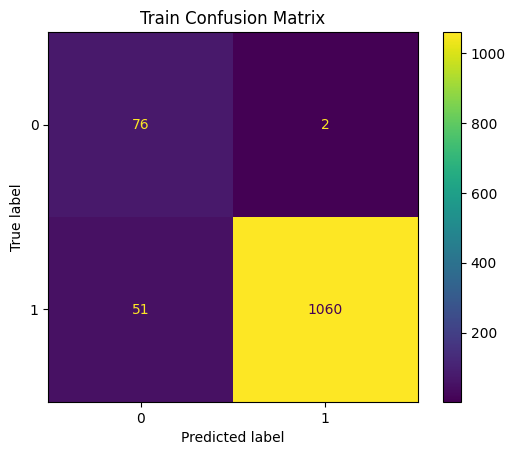


=== Test set ===
Confusion matrix:
 [[  7   9]
 [  9 273]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44        16
         1.0       0.97      0.97      0.97       282

    accuracy                           0.94       298
   macro avg       0.70      0.70      0.70       298
weighted avg       0.94      0.94      0.94       298


[Negative class = 0]
Precision (neg=0): 0.438
Recall    (neg=0): 0.438
F1        (neg=0): 0.438


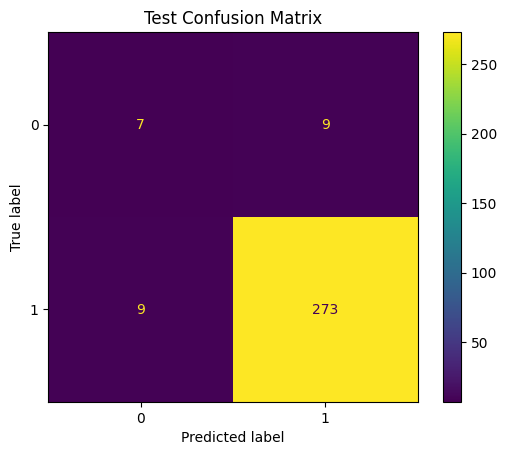

In [51]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)
import matplotlib.pyplot as plt

def evaluate_split(y_true, y_pred, split_name="Test", pos_label=1):
    print(f"\n=== {split_name} set ===")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion matrix:\n", cm)
    print("\nClassification report:")
    print(classification_report(y_true, y_pred))
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = recall_score(y_true, y_pred, pos_label=pos_label)
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)
    if pos_label == 0:
        print(f"\n[Negative class = 0]")
        print(f"Precision (neg=0): {precision:.3f}")
        print(f"Recall    (neg=0): {recall:.3f}")
        print(f"F1        (neg=0): {f1:.3f}")
    else:
        print(f"\n[Positive class = 1]")
        print(f"Precision (pos=1): {precision:.3f}")
        print(f"Recall    (pos=1): {recall:.3f}")
        print(f"F1        (pos=1): {f1:.3f}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(values_format="d")
    plt.title(f"{split_name} Confusion Matrix")
    plt.show()

evaluate_split(y1_train_true, y1_train_pred, split_name="Train", pos_label=0)
evaluate_split(y1_test_true,  y1_test_pred,  split_name="Test",  pos_label=0)

Train AUC: 0.988
Test  AUC: 0.850


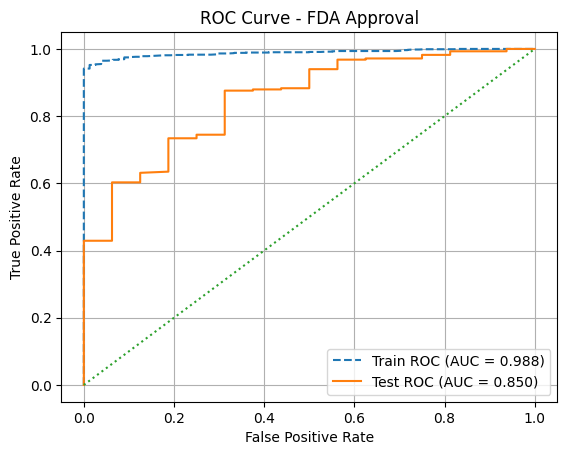

In [52]:
fpr_train, tpr_train, _ = roc_curve(y1_train_true, y1_train_proba)
auc_train = roc_auc_score(y1_train_true, y1_train_proba)

fpr_test, tpr_test, _ = roc_curve(y1_test_true, y1_test_proba)
auc_test = roc_auc_score(y1_test_true, y1_test_proba)

print(f"Train AUC: {auc_train:.3f}")
print(f"Test  AUC: {auc_test:.3f}")

plt.figure()
plt.plot(fpr_train, tpr_train, linestyle="--", label=f"Train ROC (AUC = {auc_train:.3f})")
plt.plot(fpr_test,  tpr_test,  label=f"Test ROC (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - FDA Approval")
plt.legend()
plt.grid(True)
plt.show()

### CT_Tox Eval Metrics

In [53]:
y2_train_true = train_dataset.y[:, 1]
y2_test_true  = test_dataset.y[:, 1]

y2_train_pred = train_preds_labels[:, 1]
y2_test_pred  = test_preds_labels[:, 1]

y2_train_proba = train_probs[:, 1]
y2_test_proba  = test_probs[:, 1]

print(f"Training accuracy: {np.mean(y2_train_true == y2_train_pred)}")
print(f"Test accuracy: {np.mean(y2_test_true == y2_test_pred)}")

Training accuracy: 0.9596299411269975
Test accuracy: 0.9395973154362416



=== Train set ===
Confusion matrix:
 [[1063   32]
 [  16   78]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1095
         1.0       0.71      0.83      0.76        94

    accuracy                           0.96      1189
   macro avg       0.85      0.90      0.87      1189
weighted avg       0.96      0.96      0.96      1189


[Positive class = 1]
Precision (pos=1): 0.709
Recall    (pos=1): 0.830
F1        (pos=1): 0.765


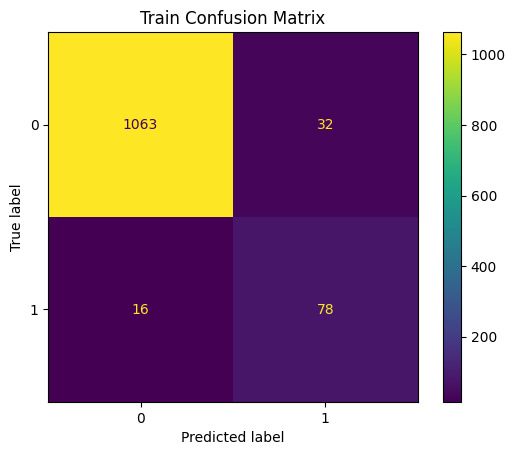


=== Test set ===
Confusion matrix:
 [[275   5]
 [ 13   5]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       280
         1.0       0.50      0.28      0.36        18

    accuracy                           0.94       298
   macro avg       0.73      0.63      0.66       298
weighted avg       0.93      0.94      0.93       298


[Positive class = 1]
Precision (pos=1): 0.500
Recall    (pos=1): 0.278
F1        (pos=1): 0.357


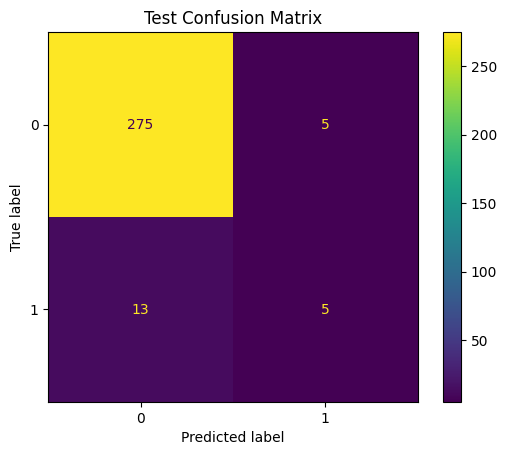

In [54]:
evaluate_split(y2_train_true, y2_train_pred, split_name="Train", pos_label=1)
evaluate_split(y2_test_true,  y2_test_pred,  split_name="Test",  pos_label=1)

Train AUC: 0.984
Test  AUC: 0.840


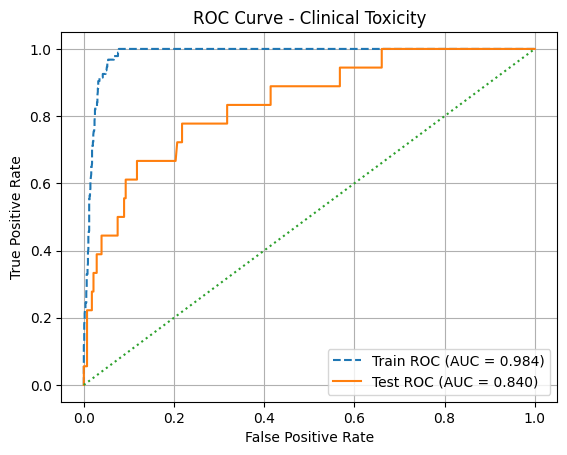

In [55]:
fpr_train, tpr_train, _ = roc_curve(y2_train_true, y2_train_proba)
auc_train = roc_auc_score(y2_train_true, y2_train_proba)

fpr_test, tpr_test, _ = roc_curve(y2_test_true, y2_test_proba)
auc_test = roc_auc_score(y2_test_true, y2_test_proba)

print(f"Train AUC: {auc_train:.3f}")
print(f"Test  AUC: {auc_test:.3f}")

plt.figure()
plt.plot(fpr_train, tpr_train, linestyle="--", label=f"Train ROC (AUC = {auc_train:.3f})")
plt.plot(fpr_test,  tpr_test,  label=f"Test ROC (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Clinical Toxicity")
plt.legend()
plt.grid(True)
plt.show()